<a href="https://colab.research.google.com/github/GeorgeShmelin/Text-Recognition/blob/main/MS_mini_project_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

## general

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

In [2]:
import gc
# gc.collect() are for rubbish collection

## general for modeling

In [13]:
from sklearn.model_selection import train_test_split

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

--------------------------------------------------------------------------------

# Task 3: Computer Vision

## 1. Load and Preprocess the Dataset
    - Use the built-in dataset MNIST (handwritten digits).
        - `from tensorflow.keras.datasets import mnist`
    - Normalize pixel values to a range between 0 and 1 for better model performance.
    - Reshape images to fit the input layer of a CNN.
    - Split the dataset into training, validation, and test sets.

In [5]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Plot 5 samples

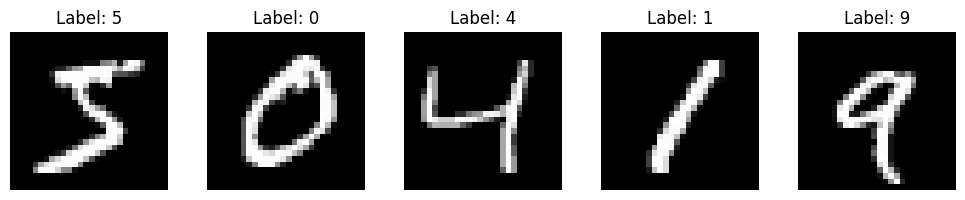

In [6]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Normalize pixel values to range [0, 1]

	•	Neural networks train faster and better when input values are scaled.
	•	Pixel values from 0–255 are too large and uneven for most models.

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Reshape to (samples, height, width, channels)

In [7]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Split the dataset into training, validation, and test sets

In [8]:
print(X_train.shape)  # Output: (60000, 28, 28, 1)
print(X_test.shape)   # Output: (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## 2. Build a Convolutional Neural Network (CNN)
    - Define a CNN architecture with convolutional, pooling, and fully connected layers.
    - Use ReLU activation functions to introduce non-linearity.
    - Apply max pooling to reduce dimensionality and computational load.
    - Add a softmax layer for classification output.

In [10]:
# Initialize the CNN
model = Sequential()

# Convolutional layer (32 filters, 3x3 kernel, ReLU activation)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Max Pooling layer (2x2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Another convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Another pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps to feed into fully connected layers
model.add(Flatten())

# Fully connected (dense) layer with 128 units
model.add(Dense(units=128, activation='relu'))

# Output layer with 10 units (one for each digit class), using softmax for classification
model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Summary:
	•	Conv2D: Detects spatial patterns in images.
	•	MaxPooling2D: Reduces spatial size and computation.
	•	Flatten: Converts 2D maps into a vector.
	•	Dense (ReLU): Learns complex features.
	•	Dense (Softmax): Gives class probabilities (0–9).

In [14]:
gc.collect()

9278

## 3. Train the Model
    - Compile the model using categorical cross-entropy loss (for multi-class classification).
    - Choose an optimizer like Adam or SGD.
    - Train the model on the training dataset using epochs and batch size.
    - Monitor performance using the validation dataset.

In [15]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000,)
(12000,)


In [16]:
# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_val_cat = to_categorical(y_val, num_classes=10)

# Compile the model
model.compile(
    optimizer=Adam(),                        # You can also try SGD()
    loss='categorical_crossentropy',         # For multi-class classification
    metrics=['accuracy']                     # Track accuracy
)

# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=10,                # Adjust for performance/speed
    batch_size=64,            # Typical range is 32–128
    verbose=1
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.8482 - loss: 2.5529 - val_accuracy: 0.9657 - val_loss: 0.1135
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9807 - loss: 0.0634 - val_accuracy: 0.9805 - val_loss: 0.0696
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9874 - loss: 0.0405 - val_accuracy: 0.9844 - val_loss: 0.0576
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9906 - loss: 0.0284 - val_accuracy: 0.9843 - val_loss: 0.0592
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 0.9919 - loss: 0.0259 - val_accuracy: 0.9860 - val_loss: 0.0619
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9909 - loss: 0.0302 - val_accuracy: 0.9852 - val_loss: 0.0682
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9939 - loss: 0.0207 - val_accuracy: 0.9858 - val_loss: 0.0626
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9937 - loss: 0.0200 - 

	•	categorical_crossentropy: Standard for multi-class problems with one-hot labels.
	•	Adam: Adaptive learning optimizer, good default choice.

Accuracy plot

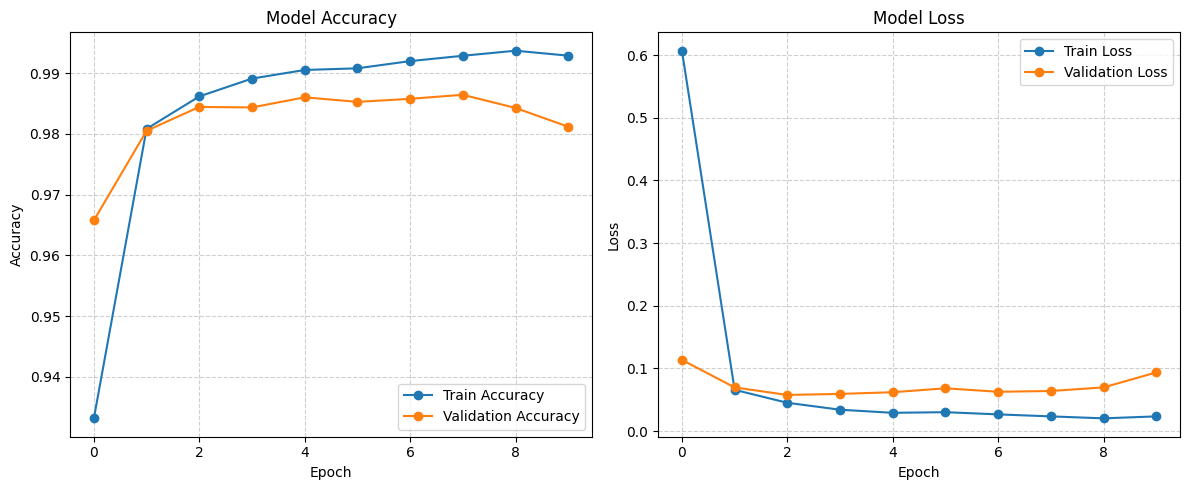

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()